In [1]:
# importing all required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df = pd.read_csv("bbk.csv")

In [117]:
df.head(10)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
5,OPPO,A53,Electric Black,6 GB,128 GB,4.3,13990.0,17990.0
6,OPPO,A12,Deep Blue,4 GB,64 GB,4.4,10490.0,11990.0
7,OPPO,A12,Black,3 GB,32 GB,4.4,9490.0,10990.0
8,OPPO,A12,Blue,3 GB,32 GB,4.4,9490.0,10990.0
9,OPPO,A12,Flowing Silver,3 GB,32 GB,4.4,9490.0,10990.0


In [100]:
# lets check the other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           323 non-null    object 
 1   Model           323 non-null    object 
 2   Color           323 non-null    object 
 3   Memory          323 non-null    object 
 4   Storage         323 non-null    object 
 5   Rating          323 non-null    float64
 6   Selling Price   323 non-null    float64
 7   Original Price  323 non-null    float64
dtypes: float64(3), object(5)
memory usage: 20.3+ KB


### Distribution of selling price and originial price

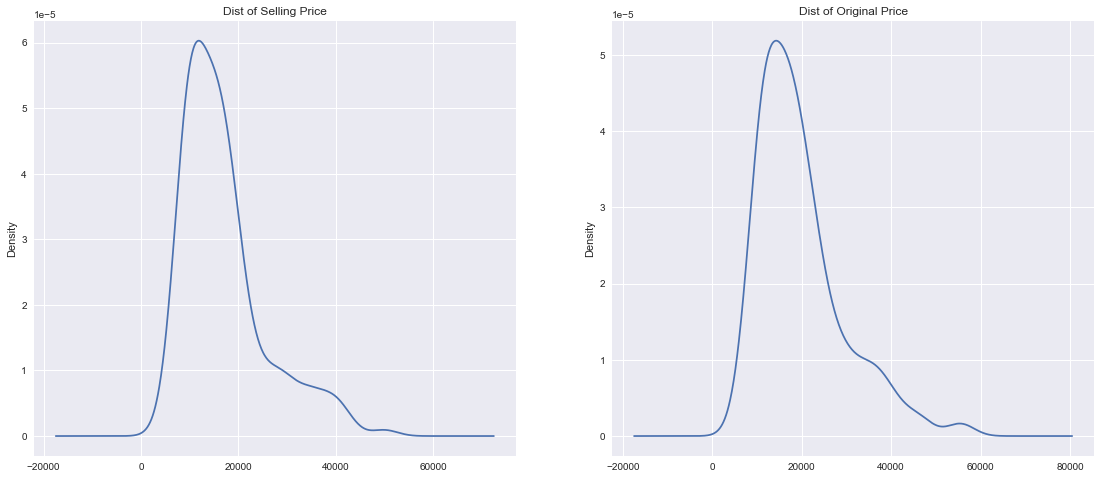

In [101]:
plt.style.use("seaborn")
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
plt.title("Dist of Selling Price")
df["Selling Price"].plot.kde()
plt.subplot(1,2,2)
plt.title("Dist of Original Price")
df["Original Price"].plot.kde()
plt.show()

In [102]:
df.describe()

,Rating,Selling Price,Original Price
count,323.000000,323.000000,323.000000
mean,4.020124,16974.613003,19749.479876
std,1.169779,8573.998098,9604.777649
min,0.000000,4999.000000,6999.000000
25%,4.300000,10499.000000,12990.000000
50%,4.400000,14999.000000,17990.000000
75%,4.400000,19990.000000,22999.000000
max,4.500000,49990.000000,55990.000000


### highest rating so far

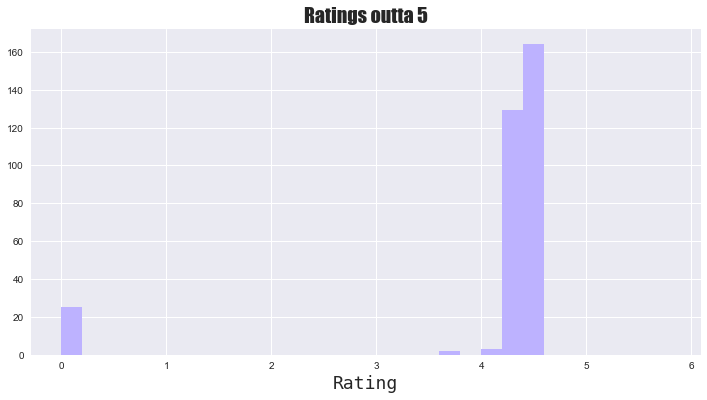

In [103]:
plt.figure(figsize=(12,6))
bins = np.arange(0,6,0.2)
plt.style.use("seaborn")
plt.hist(df["Rating"], bins=bins, color="#bdb2ff")
plt.title("Ratings outta 5", fontdict={"fontname":"impact","fontsize":20})
plt.xlabel("Rating", fontdict={"fontname":"monospace","fontsize":18})
plt.show()

In [104]:
max_rate = df["Rating"].max()
avg_rate = df["Rating"].mean()
print(f"the highest rating so far: {max_rate}\nthe average rating so far: {avg_rate}")

the highest rating so far: 4.5
the average rating so far: 4.020123839009288


### Different price segment, & what segment sells better

In [105]:
under13k = df[(df["Selling Price"]>3000.0) & (df["Selling Price"]<=13000.0)] #3k-13k
under23k = df[(df["Selling Price"]>13000.0) & (df["Selling Price"]<=23000.0)] #14k-23k
under33k = df[(df["Selling Price"]>23000.0) & (df["Selling Price"]<=33000.0)] #24k-33k
under43k = df[(df["Selling Price"]>33000.0) & (df["Selling Price"]<=43000.0)] #34k-43k
above43 = df[df["Selling Price"]>43000.0]

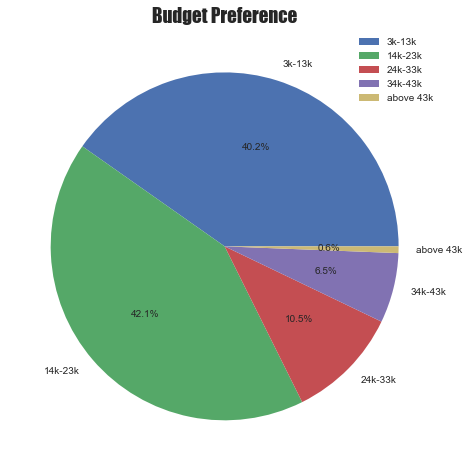

In [106]:
plt.figure(figsize=(8,8))
plt.style.use("seaborn")
plt.pie([len(under13k),len(under23k),len(under33k),len(under43k),len(above43)],labels=["3k-13k","14k-23k","24k-33k","34k-43k","above 43k"], autopct="%.1f%%")
plt.title("Budget Preference", fontdict={"fontsize":19, "fontname":"impact"})
plt.legend()
plt.show()

In [107]:
df.loc[df["Rating"]>=4.5, "Brand"].value_counts()

realme    23
OPPO      14
vivo       2
Name: Brand, dtype: int64

#### most specs offered by these brand

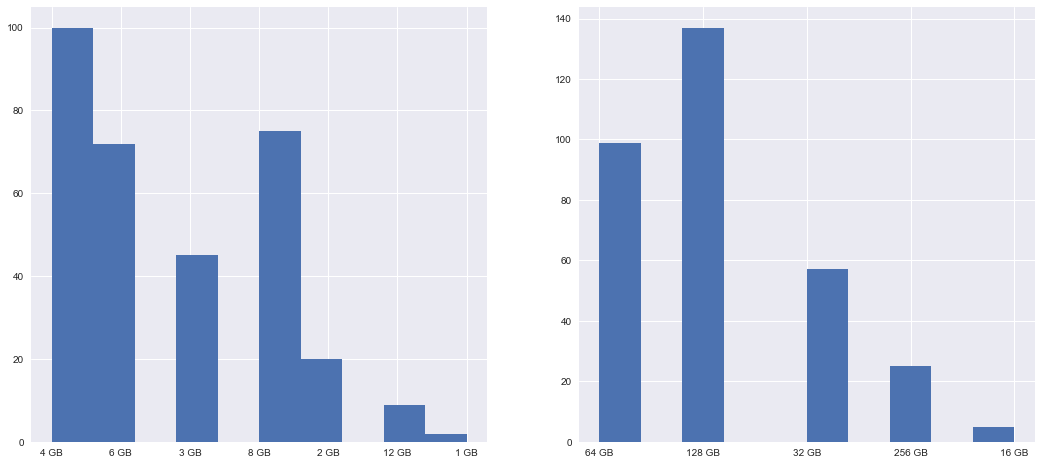

In [108]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.hist(df["Memory"])
plt.subplot(1,2,2)
plt.hist(df["Storage"])

plt.show()

#### what colors sells the most?

In [109]:
df["Color"].mode()

0    Black
dtype: object

#### now its says that Black color sells the most

In [110]:
df[df["Color"]=="Black"]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
7,OPPO,A12,Black,3 GB,32 GB,4.4,9490.0,10990.0
74,OPPO,A5s,Black,3 GB,32 GB,4.4,9490.0,12990.0
89,OPPO,A1K,Black,2 GB,32 GB,4.3,7990.0,10990.0
96,OPPO,A5s,Black,4 GB,64 GB,4.4,10990.0,15990.0
111,OPPO,Neo 5,Black,1 GB,16 GB,3.8,4999.0,7856.0
217,realme,1,Black,4 GB,64 GB,4.4,10990.0,14990.0
285,realme,3,Black,3 GB,32 GB,4.5,8499.0,10999.0
286,realme,3,Black,4 GB,64 GB,4.4,10499.0,12999.0


In [111]:
col_var = df.loc[df["Color"].str.contains("Black"), "Color"].value_counts().sort_values(ascending=False).head()
col_var

Black             8
Dynamic Black     6
Diamond Black     5
Cross Black       4
Midnight Black    3
Name: Color, dtype: int64

### Black and its Variants sell the most, we prepared a different data for them

In [112]:
black_col = df.loc[df["Color"].isin(["Black","Dynamic Black","Diamond Black","Cross Black","Midnight Black"])]
black_col.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
7,OPPO,A12,Black,3 GB,32 GB,4.4,9490.0,10990.0
32,OPPO,A15,Dynamic Black,3 GB,32 GB,4.3,10990.0,12990.0
37,OPPO,Reno3 Pro,Midnight Black,8 GB,256 GB,4.4,26798.0,28989.0
39,OPPO,A15s,Dynamic Black,4 GB,64 GB,4.3,12990.0,13990.0
61,OPPO,Reno3 Pro,Midnight Black,8 GB,128 GB,4.4,24768.0,24990.0


### what is the price distrubution for these colors cell phone

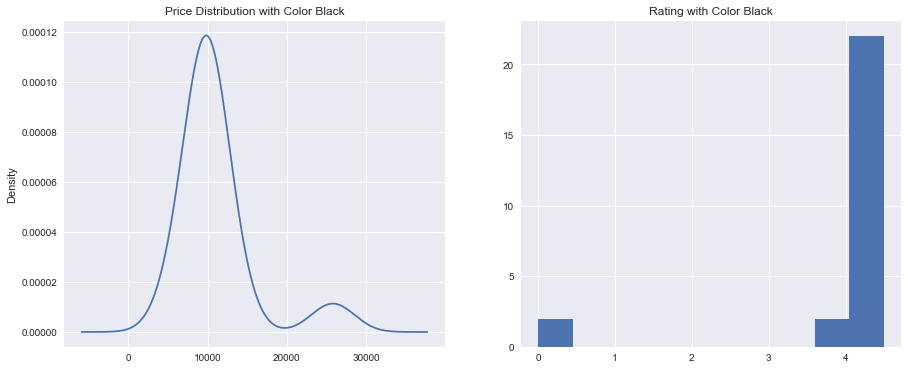

In [113]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
black_col["Selling Price"].plot.kde()
plt.title("Price Distribution with Color Black")
plt.subplot(1,2,2)
black_col["Rating"].hist()
plt.title("Rating with Color Black")

plt.show()

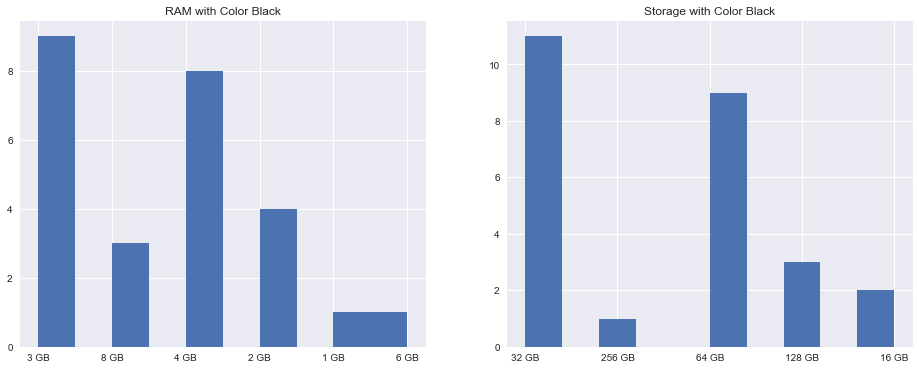

In [114]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
black_col["Memory"].hist()
plt.title("RAM with Color Black")
plt.subplot(1,2,2)
black_col["Storage"].hist()
plt.title("Storage with Color Black")
plt.show()

### These black color plays valuable role, most of the black color cell phone have 3GB RAM & 32GB ROM, followed by 4GB & 64GB

## which brand among these three manufactures most black color phones

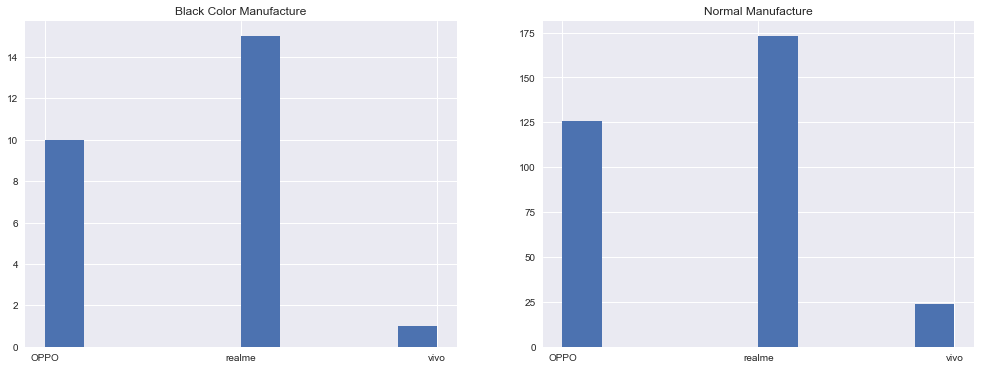

In [136]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
black_col["Brand"].hist()
plt.title("Black Color Manufacture")
plt.subplot(1,2,2)
df["Brand"].hist()
plt.title("Normal Manufacture")
plt.show()

### As you can see, Realme rules the market, even in manufacturing the best color cell phones

#### These three brands belong to a single company known as BBK Electronics